In [88]:
import pandas as pd
import numpy as np
# Importing and Exporting Data
df = pd.read_csv('/content/drive/MyDrive/Dataset/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [89]:
df['math score'].mean()

66.089

In [90]:
df['math score'].median()

66.0

In [91]:
df['math score'].mode()

,math score
0,65


In [92]:
# Hitung kuartil pertama (Q1)
q1 = df['math score'].quantile(0.25)
print("Q1 : ", q1)
# Hitung kuartil ketiga (Q3)
q3 = df['math score'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  57.0
Q3 :  77.0
IQR :  20.0


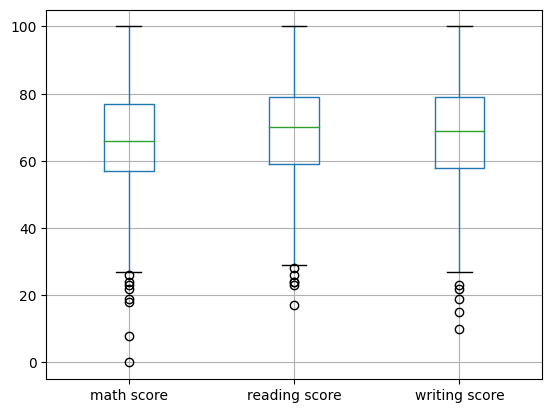

In [93]:
import matplotlib.pyplot as plt

df.boxplot(column=['math score', 'reading score', 'writing score'])
plt.show()

In [94]:
outlier_data = {
    'gender' : ['female', 'male', 'female', 'male'],
    'race/ethnicity' : ['group A', 'group B', 'group C', 'group D'],
    'parental level of education' : ['some high school', 'high school', 'some collage', 'some high school'],
    'lunch' : ['free/reduced', 'standard', 'free/reduced', 'standard'],
    'test preparation course' : ['none', 'completed', 'none', 'completed'],
    'math score' : [67, 76, 88, 56],
    'reading score' : [95, 100, 85, 100],
    'writing score' : [98, 79, 85, 78]
}

outlier_df = pd.DataFrame(outlier_data)

df = pd.concat([df, outlier_df], ignore_index=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
999,female,group D,some college,free/reduced,none,77,86,86
1000,female,group A,some high school,free/reduced,none,67,95,98
1001,male,group B,high school,standard,completed,76,100,79
1002,female,group C,some collage,free/reduced,none,88,85,85


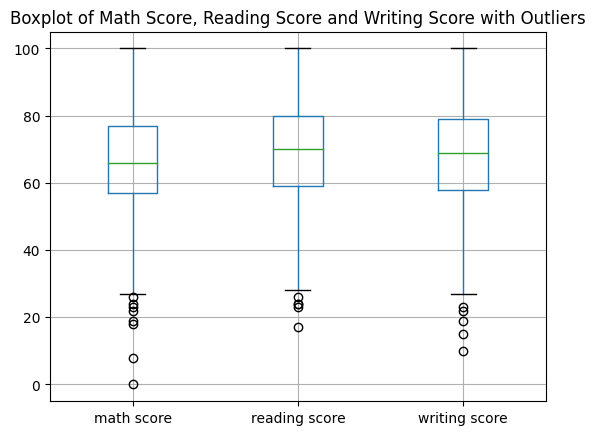

In [95]:
import matplotlib.pyplot as plt

# Membuat boxplot
df.boxplot(column=['math score', 'reading score', 'writing score'])
plt.title('Boxplot of Math Score, Reading Score and Writing Score with Outliers')
plt.show()

In [96]:
# Hitung kuartil pertama (Q1)
q1 = df['math score'].quantile(0.25)
print("Q1 : ", q1)
# Hitung kuartil ketiga (Q3)
q3 = df['math score'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
# Hitung batas bawah (Lower Bound) dan batas atas (Upper Bound) untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Temukan outlier dalam DataFrame
outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]

print("Outlier Math Score:")
print(outliers)

Q1 :  57.0
Q3 :  77.0
Outlier Math Score:
     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                  

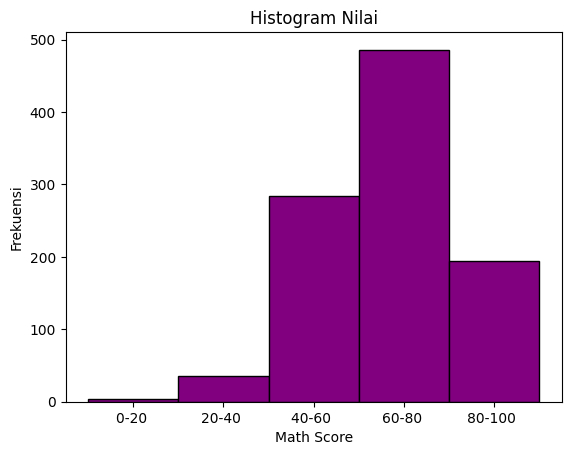

In [97]:
data_math = df["math score"]
# Buat histogram
n, bins, patches = plt.hist(data_math, bins=5, color='purple', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('Math Score')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

In [98]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['math score'] > upper_bound) | (df['math score'] < lower_bound)) | (df['writing score'] < 30) | (df['writing score'] > 200)

# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

      gender race/ethnicity parental level of education         lunch  \
999   female        group D                some college  free/reduced   
1000  female        group A            some high school  free/reduced   
1001    male        group B                 high school      standard   
1002  female        group C                some collage  free/reduced   
1003    male        group D            some high school      standard   

     test preparation course  math score  reading score  writing score  
999                     none          77             86             86  
1000                    none          67             95             98  
1001               completed          76            100             79  
1002                    none          88             85             85  
1003               completed          56            100             78  


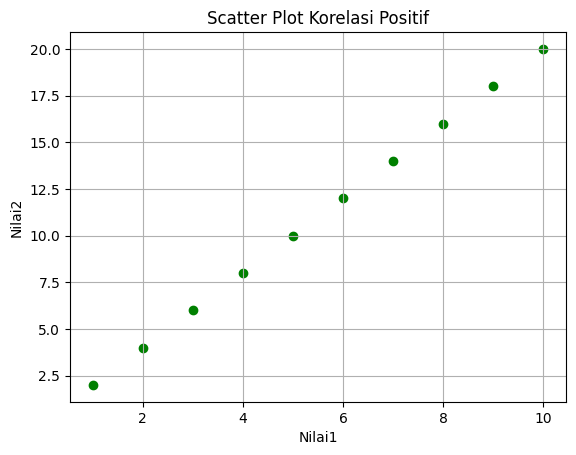

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame
data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Nilail'], df['Nilai2'], color='green', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()

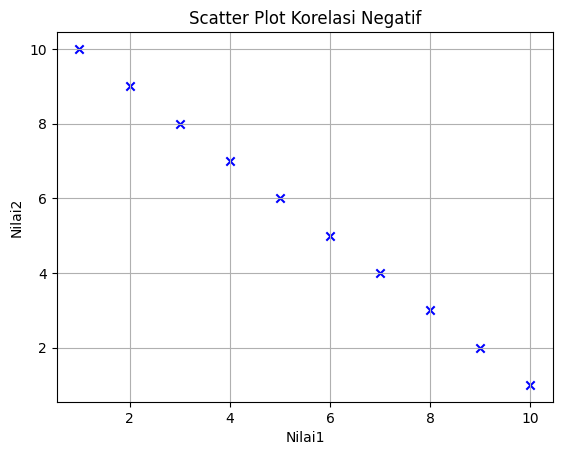

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame
data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Nilail'], df['Nilai2'], color='blue', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()